# Leveraging Similarity

## Measuring similarity between vectors

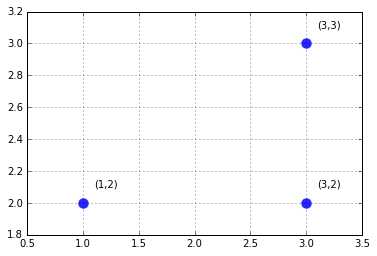

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
D = np.array([(1,2), (3,2), (3,3)]) 
plt.scatter(D[:,0], D[:,1], s=2**7, edgecolors='white',
            alpha=0.85, cmap='winter')
plt.annotate("(1,2)", (1+0.1,2+0.1))
plt.annotate("(3,2)", (3+0.1,2+0.1))
plt.annotate("(3,3)", (3+0.1,3+0.1))
plt.grid() # adds a grid
plt.show() # Showing the result

## Experimenting K-means reliability

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
print ("Features :%s" % data.feature_names)
features = data.data
labels = data.target

Features :['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
from sklearn.cluster import MiniBatchKMeans, KMeans
k_means = KMeans(n_clusters=3, init='k-means++', 
                 max_iter=999, n_init=1, random_state=101)
mb_k_means = MiniBatchKMeans(n_clusters=3, init='k-means++', 
        max_iter=999, batch_size=10, n_init=1, random_state=101)

In [4]:
k_means.fit(features)
mb_k_means.fit(features)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
        init_size=None, max_iter=999, max_no_improvement=10, n_clusters=3,
        n_init=1, random_state=101, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

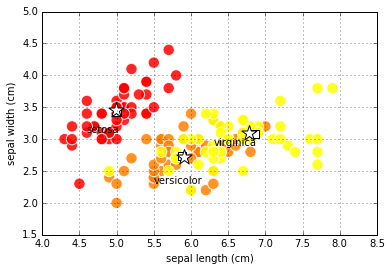

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.scatter(features[:,0], features[:,1], s=2**7, c=labels, 
            edgecolors='white', alpha=0.85, cmap='autumn')
plt.grid() # adds a grid
plt.xlabel(data.feature_names[0]) # adds label to x axis
plt.ylabel(data.feature_names[1]) # adds label to y axis
# Printing centroids, first of regular K-means, then of mini-batch
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],
            s=2**6, marker='s', c='white') 
plt.scatter(mb_k_means.cluster_centers_[:,0], 
            mb_k_means.cluster_centers_[:,1], s=2**8, marker='*', c='white')
for class_no in range(0,3): # We just annotate a point for each class
    plt.annotate(data.target_names[class_no], 
                 (features[3+50*class_no,0],features[3+50*class_no,1]))
plt.show() # Showing the result

## Experimenting how centroids converge

In [6]:
import numpy as np
np.set_printoptions(precision=3, suppress=True) # sets output to 3 decimal points
for iteration in range(1, 10):
    k_means = KMeans(n_clusters=3, init='random', 
                     max_iter=iteration, n_init=1, random_state=101)
    k_means.fit(features)
    print ("Iteration: %i - 2nd centroid: %s" % 
           (iteration, k_means.cluster_centers_[1]))

Iteration: 1 - 2nd centroid: [ 5.362  3.763  1.512  0.275]
Iteration: 2 - 2nd centroid: [ 4.959  3.352  1.47   0.246]
Iteration: 3 - 2nd centroid: [ 4.914  3.268  1.539  0.275]
Iteration: 4 - 2nd centroid: [ 4.878  3.188  1.58   0.295]
Iteration: 5 - 2nd centroid: [ 4.833  3.153  1.583  0.294]
Iteration: 6 - 2nd centroid: [ 4.8    3.109  1.606  0.303]
Iteration: 7 - 2nd centroid: [ 4.783  3.087  1.62   0.307]
Iteration: 8 - 2nd centroid: [ 4.776  3.072  1.621  0.297]
Iteration: 9 - 2nd centroid: [ 4.776  3.072  1.621  0.297]


In [7]:
import numpy as np
from sklearn.datasets import make_circles, make_blobs
strange_data  = make_circles(n_samples=500, shuffle=True, 
                             noise=0.15, random_state=101, factor=0.5)
center = make_blobs(n_samples=100, n_features=2, centers=1, 
                    cluster_std=0.1, center_box=(0, 0))
first_half    = np.row_stack((strange_data[0][:250,:],center[0][:50,:]))
first_labels  = np.append(strange_data[1][:250],np.array([0]*50))
second_half   = np.row_stack((strange_data[0][250:,:],center[0][50:,:]))
second_labels = np.append(strange_data[1][250:],np.array([0]*50))

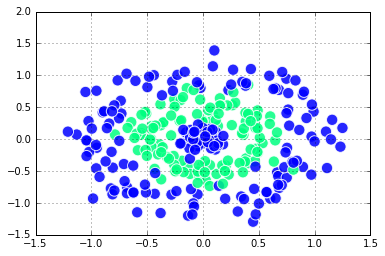

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.scatter(first_half[:,0], first_half[:,1], s=2**7, 
    c=first_labels, edgecolors='white', 
            alpha=0.85, cmap='winter')
plt.grid() # adds a grid
plt.show() # Showing the result

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kNN = KNeighborsClassifier(n_neighbors=3, weights='uniform',
                        algorithm='auto', metric='euclidean')
kNN.fit(first_half,first_labels)
print ("Learning accuracy score:%0.3f" % 
       accuracy_score(y_true=second_labels, 
                      y_pred=kNN.predict(second_half)))

Learning accuracy score:0.937
